In [3]:
from os.path import join, split, exists
import math

import numpy as np
import pylab as py
import matplotlib.pyplot as plot
import matplotlib.image as mpimage
from scipy import signal, ndimage
from PIL import Image
import cv2

%matplotlib inline

In [4]:
def array_to_image(array):
    return Image.fromarray(array)

def image_to_array(image, stdize=True):
    if isinstance(image, str) and exists(image): image = Image.open(image)
    img_array = np.asarray(image)
    if stdize: img_array = stdize_array(img_array)
    return img_array

def stdize_array(img_array):
    img_array.astype(float)
    mean = np.mean(img_array)
    std = np.std(img_array)
    width = img_array.shape[0]
    height = img_array.shape[1]
    new_array = np.empty(shape=(width, height))
        
    for x in range(width):
            
        for y in range(height):
            new_array[x][y] = img_array[x][y] - mean * 1 / std
    return new_array
    
def image_to_gray(image_path):
    gray_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY)
    path_parts = split(image_path)
    gray_name = 'gray_{}'.format(path_parts[-1])
    gray_path = join(*(path_parts[:-1]), gray_name)
    cv2.imwrite(gray_path, gray_image)
    return Image.open(gray_path)

def receptive_field(func, size=(16, 16)):
    field = np.zeros(shape=size)
    width = size[0]
    height = size[1]
    
    for x in range(width):
        
        for y in range(height):
            field[x][y] = func(x - width / 2, y - height / 2)
    return field

def gaussian_2d(x, y, k=5, sigma=1.6):
    # shamelessly ripped }:)
    x = (1.0 / (1 * math.pi * (sigma ** 2))) \
        * math.exp(-(1.0 / (2 * (sigma ** 2))) * (x ** 2 + y ** 2))
    y = (1.0 / (1 * math.pi * (sigma ** 2) * (k ** 2))) \
        * math.exp(-(1.0 / (2 * (sigma ** 2) * (k ** 2))) * (x ** 2 + y ** 2))
    return x - y

def gaussian_2d_diff(x, y, sigma1=1.6, sigma2=3.6):
    return gaussian_2d(x, y, sigma1) - gaussian_2d(x, y, sigma2)

def rgc_receptive_field(image):
    rgc = signal.convolve(image, receptive_field(lambda x, y: gaussian_2d(x, y, 5, 1.6)))
    return rgc

def gabor_filter(x, y, sigma_x, sigma_y, f_x, f_y):
    # shamelessly ripped }:)
    return (1 / (2 * math.pi * sigma_x * sigma_y)) \
        * math.exp(-0.5 * (((x * x) / (sigma_x * sigma_x)) \
                            + ((y * y)/(sigma_y * sigma_y)))) \
        * math.cos(2 * math.pi * f_x * x + f_y * y)

def sc_receptive_field(image):
    return signal.convolve(image, receptive_field(lambda x, y: gabor_filter(x, y, 4, 7, 0.1, 0)))

def apply_field(field, image):
    return result

def show_image(image, size=(25, 25)):
    py.figure(figsize=size)  # sizing
    py.subplot(3, 1, 1)  # scaling & positioning
    py.imshow(image, cmap=py.cm.Greys_r)
    return

def show_array(array, size=(25, 25)):
    image = array_to_image(array)
    show_image(image, size)
    return

In [5]:
image_names = ['snow_path.jpg', 'city_view.jpg', 'shrimp_under_water.jpg']
gray_images = [image_to_gray(join('res', im)) for im in image_names]


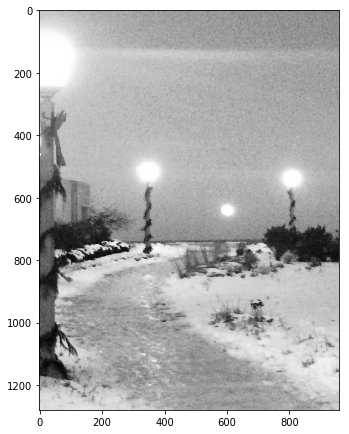

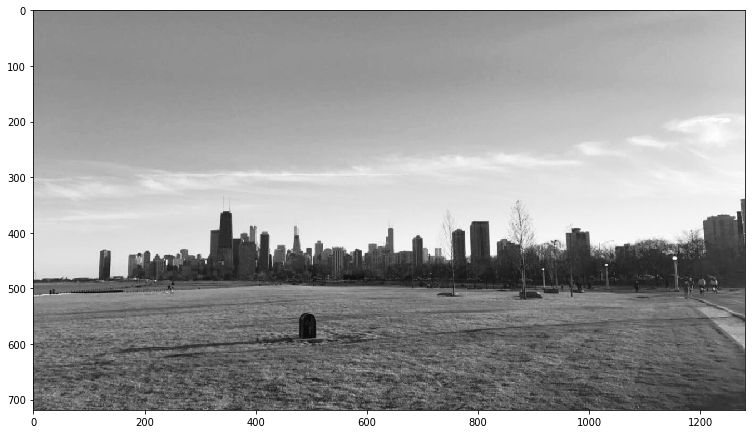

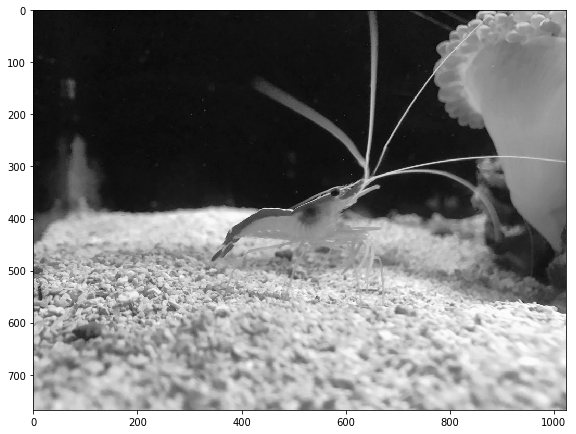

In [6]:
for img in gray_images: show_image(img)

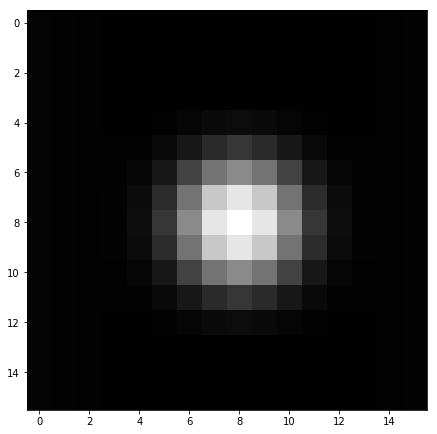

In [153]:
show_image(receptive_field(lambda x, y: gaussian_2d(x, y, 5.0, 1.6)))

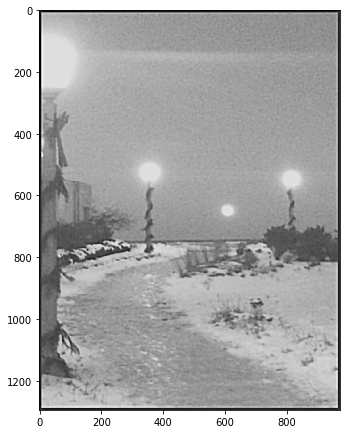

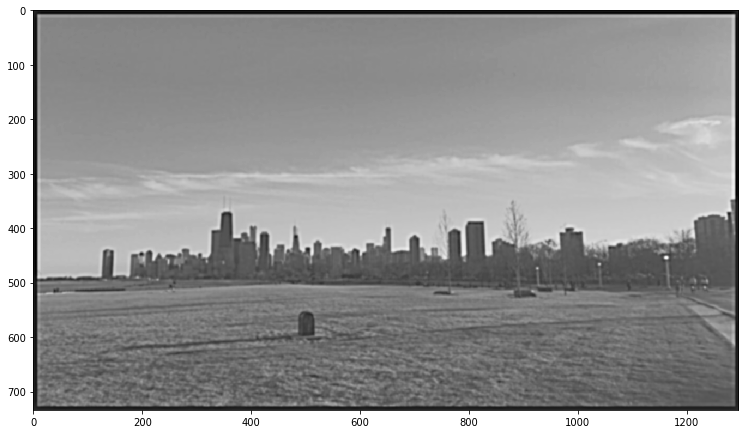

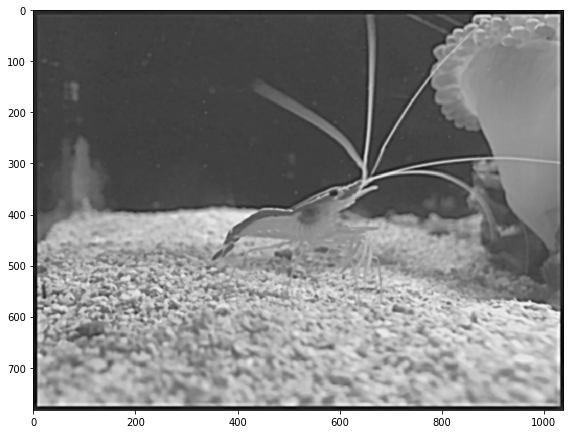

In [7]:
for im in gray_images: show_image(rgc_receptive_field(im))

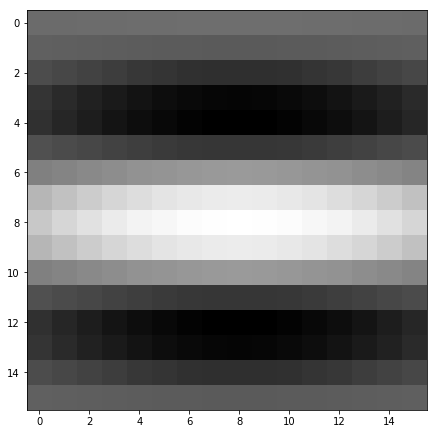

In [157]:
show_image(receptive_field(lambda x, y: gabor_filter(x, y, 4, 7, 0.1, 0)))

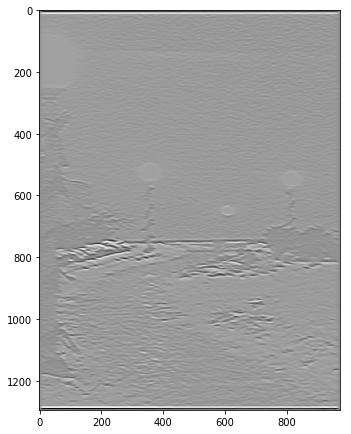

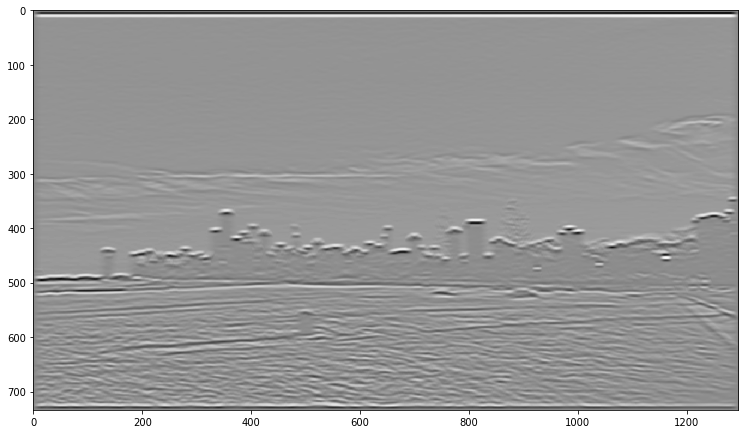

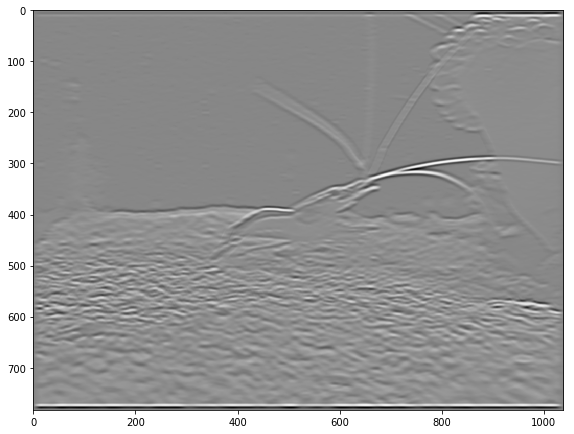

In [8]:
for im in gray_images: show_image(sc_receptive_field(im))